In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv -O car-price.csv

--2023-09-26 16:41:44--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: ‘car-price.csv’

car-price.csv       100%[===================>]   1,41M  1,53MB/s    in 0,9s    

2023-09-26 16:41:46 (1,53 MB/s) - ‘car-price.csv’ saved [1475504/1475504]



## Load and prepare data

In [9]:
df_raw = pd.read_csv('car-price.csv')
df_raw = df_raw[['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']]
df_raw = df_raw.rename(columns={"MSRP": "price"})
df_raw.columns = df_raw.columns.str.replace(' ', '_').str.lower()
df_raw

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [12]:
df_raw.isnull().sum()
data = df_raw.fillna(0)
data.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

### Question 1  
What is the most frequent observation (mode) for the column transmission_type?  
(Automatic)

<Axes: xlabel='transmission_type'>

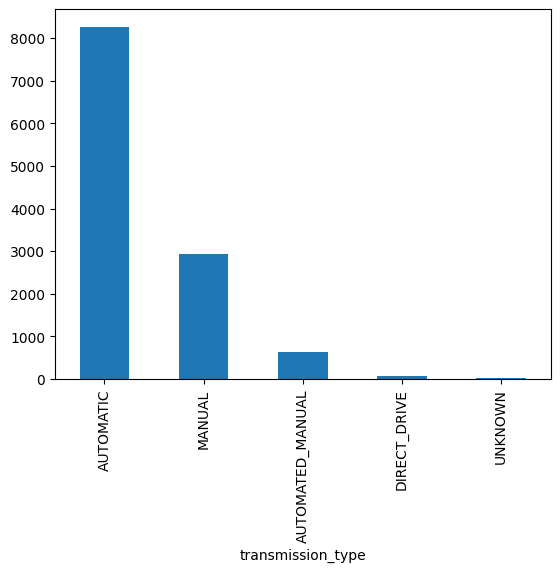

In [17]:
data.transmission_type.value_counts().plot(kind='bar',)

## Question 2  
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.  

What are the two features that have the biggest correlation in this dataset?  

engine_hp and year  
engine_hp and engine_cylinders  
highway_mpg and engine_cylinders  
** highway_mpg and city_mpg  ** 0.886829

In [23]:
all_columns = list(data.columns)
categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)
numerical_columns = [col for col in all_columns if col not in categorical_columns]
print(categorical_columns)
print(numerical_columns)

['make', 'model', 'transmission_type', 'vehicle_style']
['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']


In [24]:
corr = data[numerical_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


### Make price binary  
Now we need to turn the price variable from numeric into a binary format.  
Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.  
#### Split the data  
Split your data in train/val/test sets with 60%/20%/20% distribution.  
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.  
Make sure that the target value (price) is not in your dataframe.  


In [27]:
price_mean = data.price.mean()
data['above_average'] = data.price > price_mean
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,True
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,True
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,False
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,False
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,False
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,True
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,True
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,True
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,True


In [37]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print(f'train size : {df_train.shape[0]}') 
print(f'val size : {df_val.shape[0]}') 
print(f'test size : {df_test.shape[0]}') 

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


train size : 7148
val size : 2383
test size : 2383


In [38]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['price']
del df_val['price']
del df_test['price']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

## Question 3  
Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).  
Which of these variables has the lowest mutual information score?  

make  
model  
** transmission_type ** (0.021)
vehicle_style  

the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables.  
More specifically, it quantifies the "amount of information" (in units such as shannons (bits), nats or hartleys) obtained about one random variable by observing the other random variable. The concept of mutual information is intimately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable.


In [42]:
from sklearn.metrics import mutual_info_score

for cat in categorical_columns : 
    mutual_info = mutual_info_score(y_train, df_train[cat])
    print(f'category : {cat},\t score :{mutual_info:.2}')

category : make,	 score :0.24
category : model,	 score :0.46
category : transmission_type,	 score :0.021
category : vehicle_style,	 score :0.084


## Question 4
* one-hot encoding - for categorial parameters  
* Fit the model on the training dataset.  
* To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.  
What accuracy did you get?  

0.60  
0.72  
0.84  
0.95  

In [ ]:
numerical_columns.remove('price')

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

def norm_data(df_train, numerical_columns, categorical_columns):
    # Normlizing the numerical variables
    X_train_num = df_train[numerical_columns].values
    
    scaler = StandardScaler()
    X_train_num = scaler.fit_transform(X_train_num)
    
    # One hot encoding to the categorical variables
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    X_train_cat = ohe.fit_transform(df_train[categorical_columns].values)
    
    # Combine to one set
    X_train = np.column_stack([X_train_num, X_train_cat])
    return X_train, scaler, ohe

In [72]:
X_train, scaler, ohe = norm_data(df_train, numerical_columns, categorical_columns)

/Users/morsondak/Library/Caches/pypoetry/virtualenvs/ml-zoomcamp-yJafJBqb-py3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [73]:
#prepare the validation set
def validate_model(df_val, scaler, ohe, numerical_columns, categorical_columns):
    X_val_num = df_val[numerical_columns].values
    X_val_num = scaler.transform(X_val_num)
    
    X_val_cat = ohe.transform(df_val[categorical_columns].values)
    
    X_val = np.column_stack([X_val_num, X_val_cat])
    
    # check accuracy
    y_pred = model.predict_proba(X_val)[:, 1]
    
    return accuracy_score(y_val, y_pred >= 0.5)


In [80]:
model_accuracy = validate_model(df_val, scaler, ohe, numerical_columns, categorical_columns)
print(model_accuracy)

0.9362148552245069


### Question 5
Let's find the least useful feature using the feature elimination technique.  
Train a model with all these features (using the same parameters as in Q4).  
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.  
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.  
Which of following feature has the smallest difference?  

year  
engine_hp  
transmission_type  
city_mpg  


In [84]:
for feautre in ['year', 'engine_hp', 'transmission_type', 'city_mpg'] : 
    eliminated_cat_columns = categorical_columns
    eliminated_num_columns = numerical_columns
    
    if feautre in categorical_columns : eliminated_cat_columns.remove(feautre)
    if feautre in numerical_columns : eliminated_num_columns.remove(feautre)        
        
    X_train, scaler, ohe= norm_data(df_train, eliminated_num_columns, eliminated_cat_columns)
    
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    accuracy = validate_model(df_val, scaler, ohe, eliminated_num_columns, eliminated_cat_columns)

    print(f'The accuracy of the model wothout {feautre} : {model_accuracy - accuracy}')



/Users/morsondak/Library/Caches/pypoetry/virtualenvs/ml-zoomcamp-yJafJBqb-py3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The accuracy of the model wothout year : 0.0
The accuracy of the model wothout engine_hp : 0.0


/Users/morsondak/Library/Caches/pypoetry/virtualenvs/ml-zoomcamp-yJafJBqb-py3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/morsondak/Library/Caches/pypoetry/virtualenvs/ml-zoomcamp-yJafJBqb-py3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The accuracy of the model wothout transmission_type : 0.0
The accuracy of the model wothout city_mpg : 0.0


/Users/morsondak/Library/Caches/pypoetry/virtualenvs/ml-zoomcamp-yJafJBqb-py3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
